In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, header=None, names=column_names)

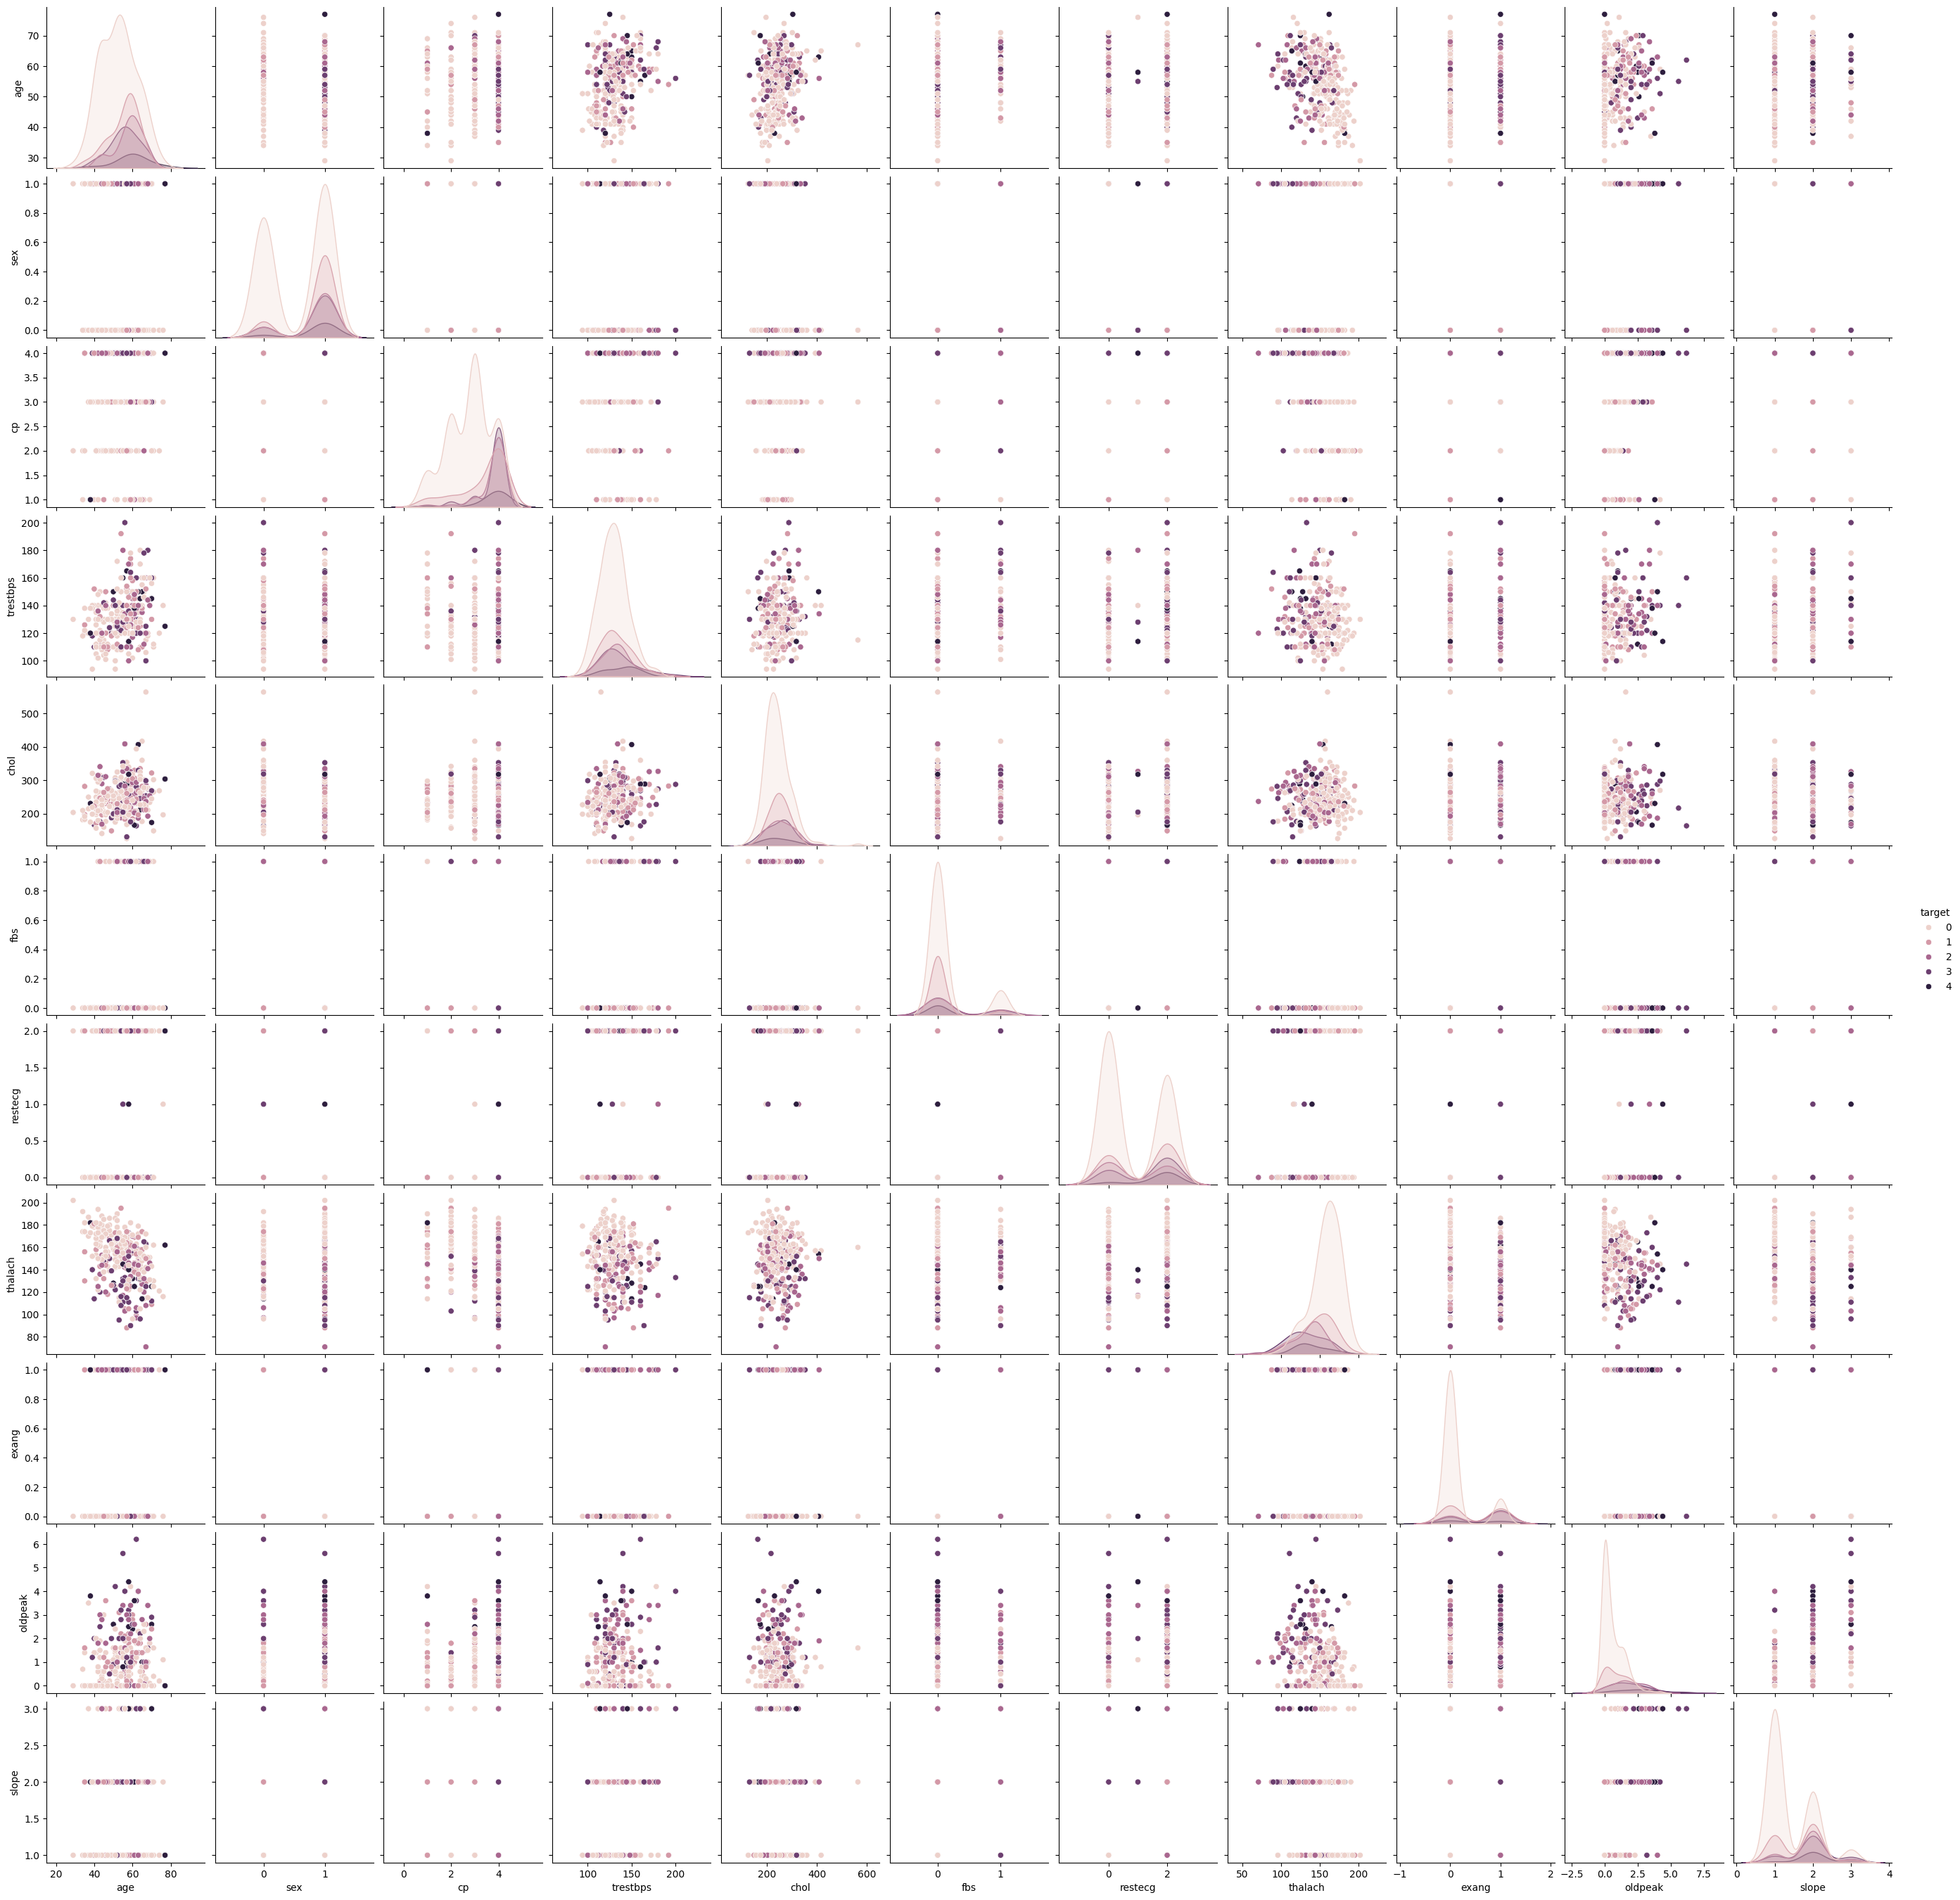

In [3]:
sns.pairplot(df, hue='target')
plt.show()

In [8]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

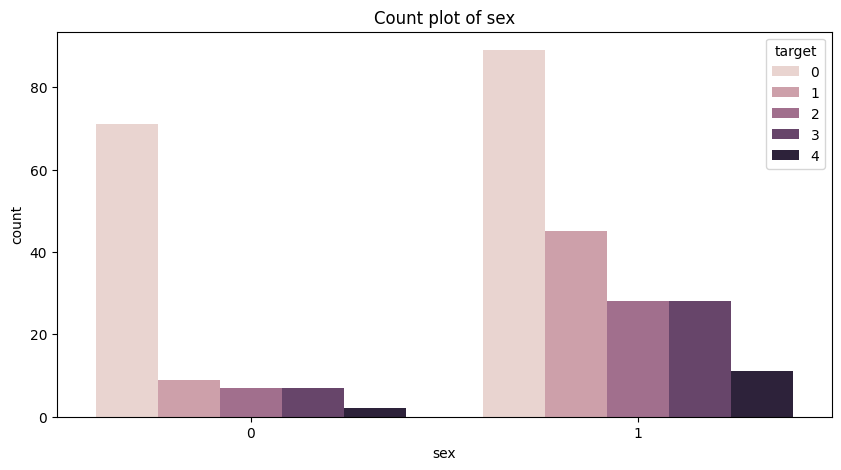

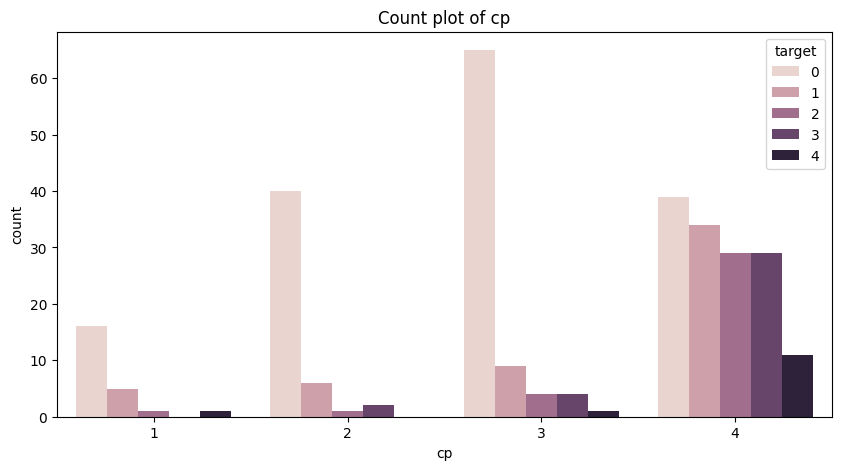

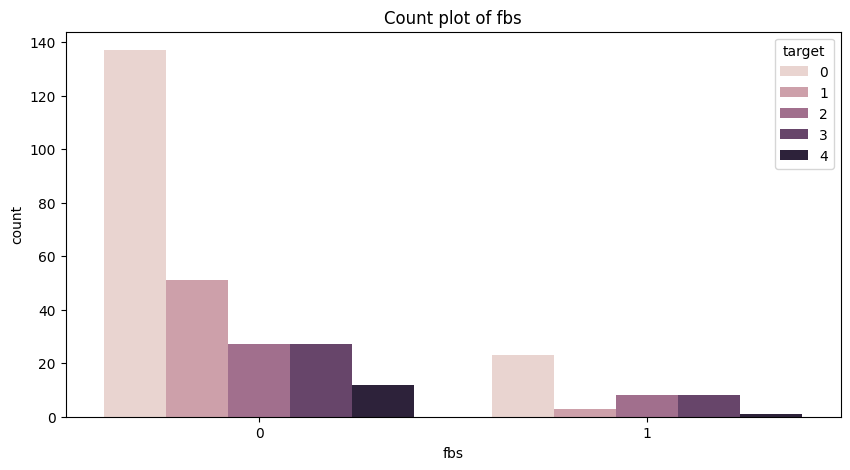

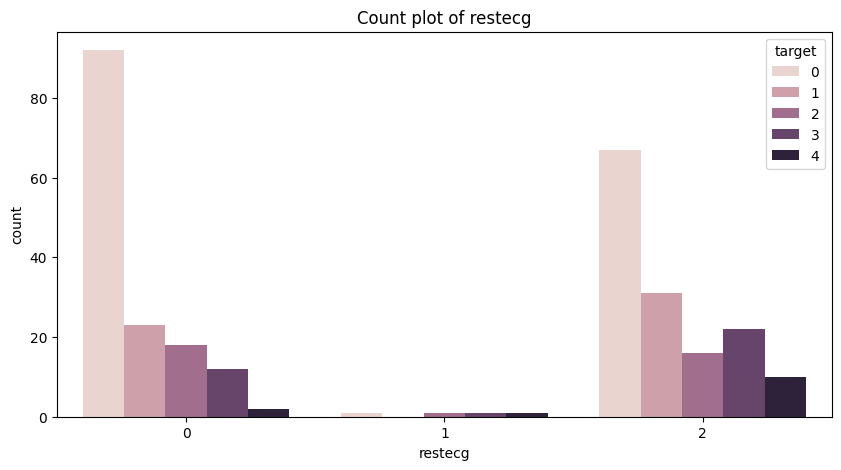

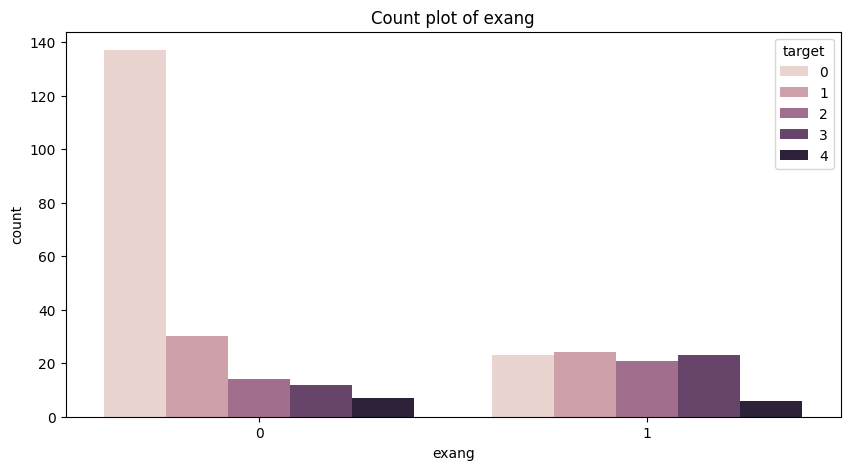

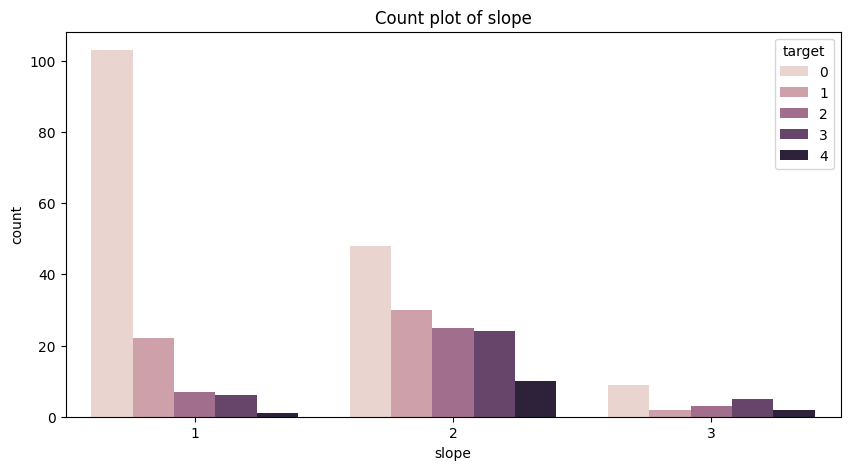

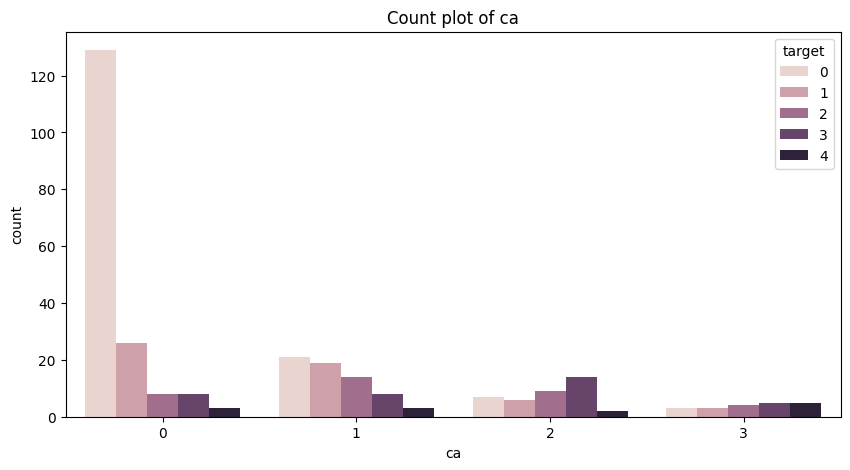

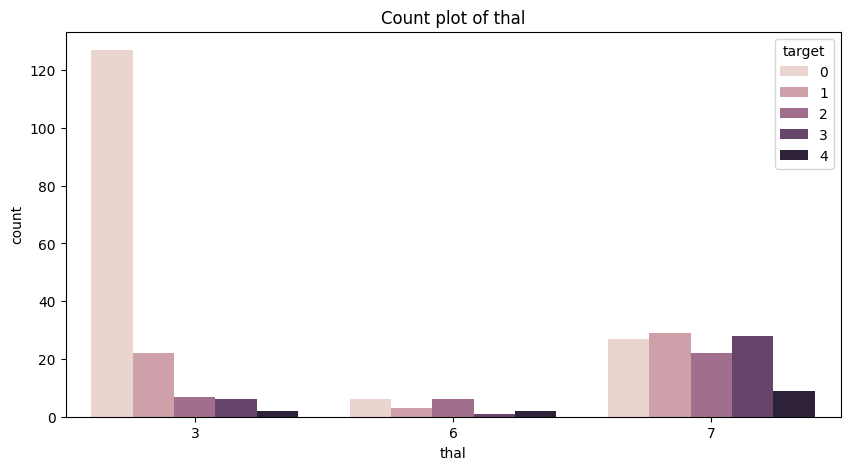

In [14]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'Count plot of {col}')
    plt.show()

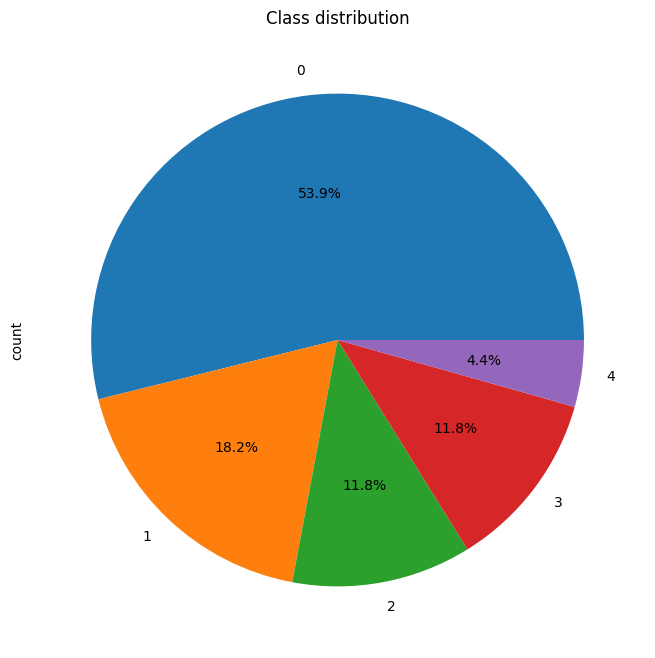

In [15]:
plt.figure(figsize=(8, 8))
df['target'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class distribution')
plt.show()

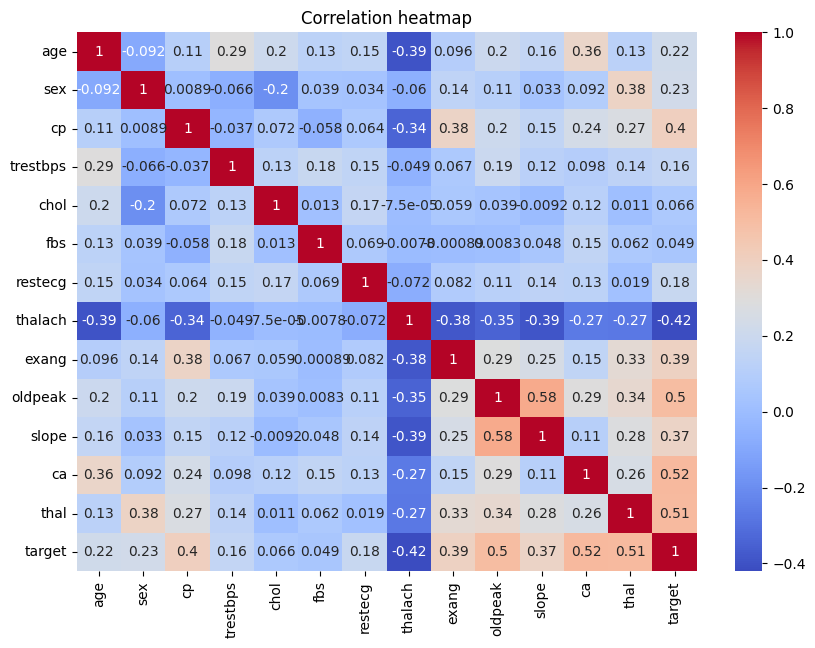

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [27]:
from imblearn.over_sampling import SMOTE

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
X = df.drop('target', axis=1)
y = df['target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(max_iter=8050)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_log_reg, average='weighted'))

Logistic Regression:
Accuracy: 0.68125
Precision: 0.6872585347854607
Recall: 0.68125
F1-Score: 0.6822967680326775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print("\nLinear Discriminant Analysis (LDA):")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Precision:", precision_score(y_test, y_pred_lda, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lda, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_lda, average='weighted'))

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

print("\nQuadratic Discriminant Analysis (QDA):")
print("Accuracy:", accuracy_score(y_test, y_pred_qda))
print("Precision:", precision_score(y_test, y_pred_qda, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_qda, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_qda, average='weighted'))


Linear Discriminant Analysis (LDA):
Accuracy: 0.64375
Precision: 0.653368187182605
Recall: 0.64375
F1-Score: 0.6460037158950317

Quadratic Discriminant Analysis (QDA):
Accuracy: 0.40625
Precision: 0.5742865896358543
Recall: 0.40625
F1-Score: 0.36521879635515997


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [58]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train, y_train)
y_pred_cart = cart.predict(X_test)

print("\nDecision Tree (CART):")
print("Accuracy:", accuracy_score(y_test, y_pred_cart))
print("Precision:", precision_score(y_test, y_pred_cart, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_cart, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_cart, average='weighted'))


Decision Tree (CART):
Accuracy: 0.75
Precision: 0.744609375
Recall: 0.75
F1-Score: 0.7454680506250965


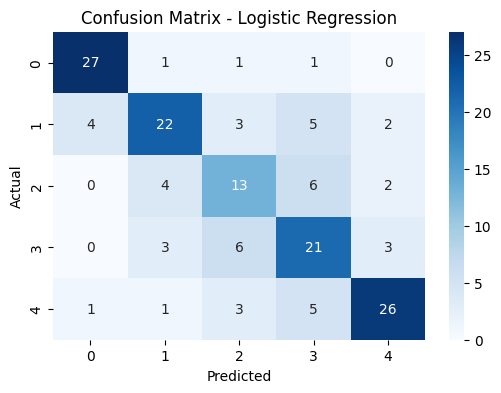

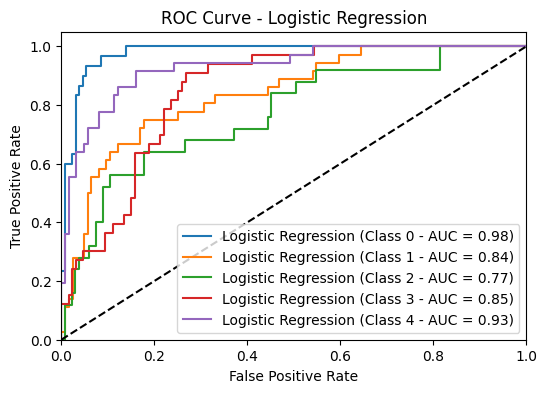

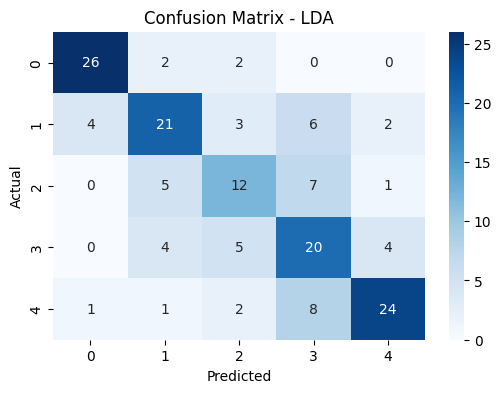

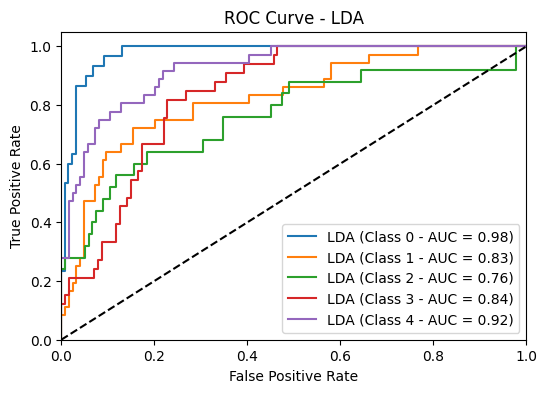

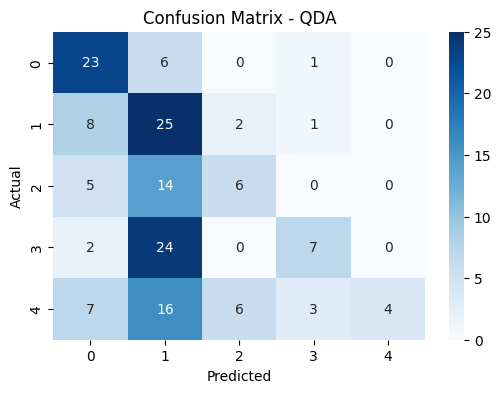

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


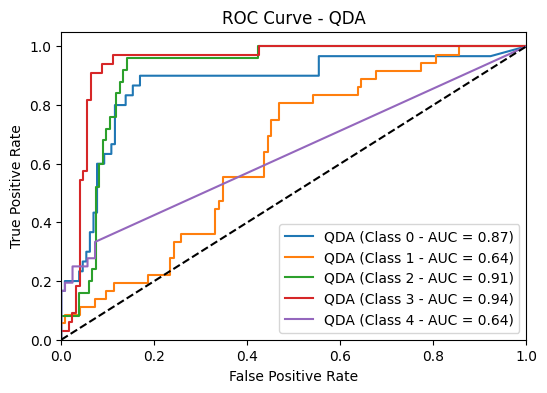

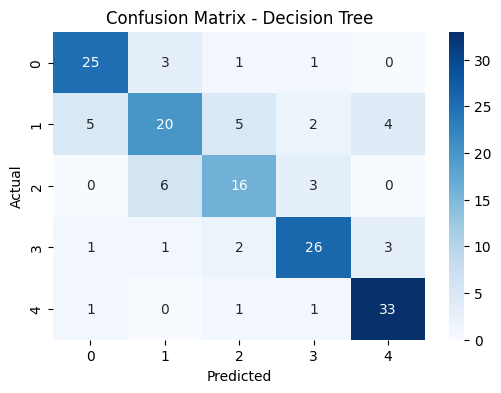

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:551: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


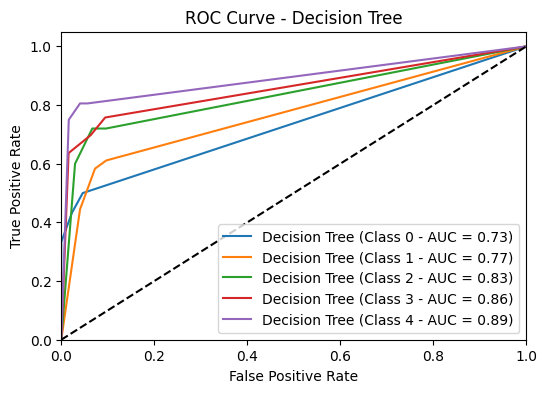

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

models = {
    "Logistic Regression": log_reg,
    "LDA": lda,
    "QDA": qda,
    "Decision Tree": cart
}


n_classes = len(np.unique(y_test))

for name, model in models.items():
    # Confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve and AUC for multiclass
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # Use OneVsRestClassifier for multiclass ROC
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

    # Check and handle NaN or infinite values in y_score
    y_score = np.nan_to_num(y_score)  # Replace NaN and inf with finite values

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(6, 4))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{name} (Class {i} - AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

log_reg.fit(X_train_scaled, y_train_scaled)
lda.fit(X_train_scaled, y_train_scaled)
qda.fit(X_train_scaled, y_train_scaled)
cart.fit(X_train_scaled, y_train_scaled)

models_scaled = {
    "Logistic Regression": log_reg,
    "LDA": lda,
    "QDA": qda,
    "Decision Tree": cart
}
for name_scaled, model_scaled in models_scaled.items():
    print(f"\n{name_scaled} after scaling:")
    print("Accuracy:", accuracy_score(y_test_scaled, model_scaled.predict(X_test_scaled)))
    # The 'average' argument should be passed to precision_score, not predict
    y_pred_scaled = model_scaled.predict(X_test_scaled)
    print("Precision:", precision_score(y_test_scaled, y_pred_scaled, average='weighted'))
    print("Recall:", recall_score(y_test_scaled, y_pred_scaled, average='weighted')) # Applying the same fix for recall_score


Logistic Regression after scaling:
Accuracy: 0.65625
Precision: 0.66133399839045
Recall: 0.65625

LDA after scaling:
Accuracy: 0.64375
Precision: 0.653368187182605
Recall: 0.64375

QDA after scaling:
Accuracy: 0.5375
Precision: 0.6342335271317829
Recall: 0.5375

Decision Tree after scaling:
Accuracy: 0.75
Precision: 0.744609375
Recall: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


      Feature  Importance
2        chol    0.169187
3     thalach    0.163683
4     oldpeak    0.124055
8        cp_4    0.102667
0         age    0.097059
1    trestbps    0.091309
17       ca_3    0.041549
19     thal_7    0.036924
15       ca_1    0.030589
6        cp_2    0.030256
18     thal_6    0.027952
16       ca_2    0.021916
10  restecg_1    0.013790
9       fbs_1    0.013741
13    slope_2    0.008418
7        cp_3    0.007070
11  restecg_2    0.006078
14    slope_3    0.005955
12    exang_1    0.005638
5       sex_1    0.002163


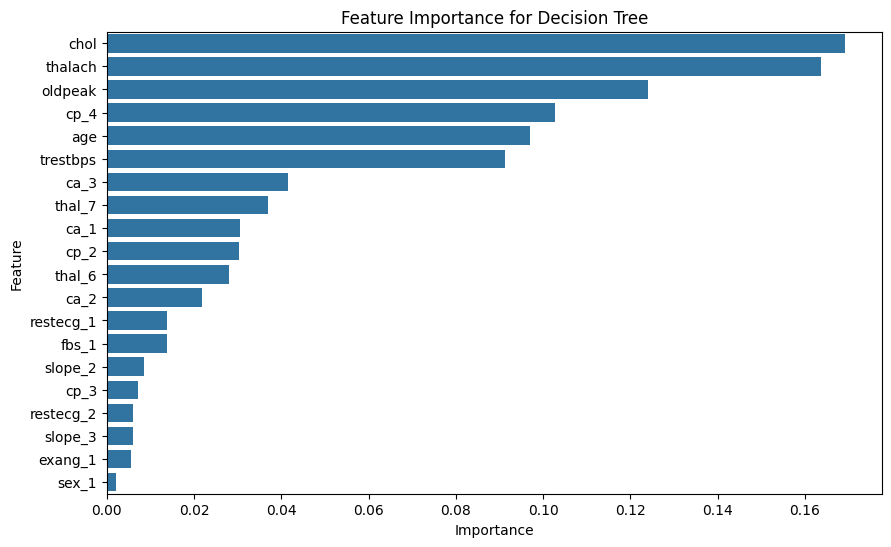

In [82]:
# Feature importance for Decision Tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# Assuming 'cart' is your DecisionTreeClassifier object
feature_importances = cart.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Decision Tree')
plt.show()

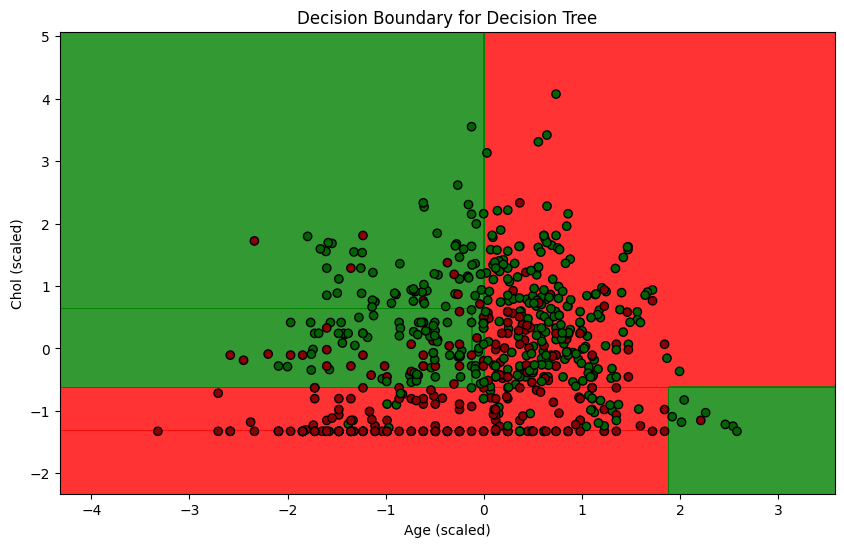

In [86]:
from matplotlib.colors import ListedColormap
X_selected = X[['age', 'chol']]

X_train_np = X_train.to_numpy()  # or X_train.values
X_test_np = X_test.to_numpy()    # or X_test.values

# Accessing columns by index in NumPy array
X_train_selected = scaler.fit_transform(X_train_np[:, [0, 4]])
X_test_selected = scaler.transform(X_test_np[:, [0, 4]])

# Train a decision tree with selected features
tree_small = DecisionTreeClassifier(max_depth=3)
tree_small.fit(X_train_selected, y_train)

# Plot decision boundary
x_min, x_max = X_train_selected[:, 0].min() - 1, X_train_selected[:, 0].max() + 1
y_min, y_max = X_train_selected[:, 1].min() - 1, X_train_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = tree_small.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['red', 'green']))
plt.scatter(X_train_selected[:, 0], X_train_selected[:, 1], c=y_train, edgecolor='k', marker='o', cmap=ListedColormap(['darkred', 'darkgreen']))
plt.title('Decision Boundary for Decision Tree')
plt.xlabel('Age (scaled)')
plt.ylabel('Chol (scaled)')
plt.show()